In [237]:
# While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.
# As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
# To do this you are tasked with:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
# Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.
# As final considerations:

# * You must use the Pandas Library and the Jupyter Notebook.
# * You must use the Matplotlib library.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
# * Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
# * Remember when making your plots to consider aesthetics!
#   * Your legends should not be overlaid on top of any data.
#   * Your bar graph should indicate tumor growth as red and tumor reduction as green.
#     It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
# * See [Starter Workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

In [238]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from random import random
from scipy.stats import sem

In [239]:
import warnings
warnings.filterwarnings('ignore')

In [240]:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [241]:
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

In [242]:
merge_data_df = pd.merge(mouse_drug_df, clinical_trial_df, how='left', on=['Mouse ID'])
merge_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [243]:
merge_data_df.groupby(['Drug', 'Timepoint']).mean()
merge_data_df.sort_values('Drug', axis= 0, ascending=True, inplace=True, na_position='last')
merge_data_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
569,b128,Capomulin,5,45.651331,0
693,g288,Capomulin,0,45.000000,0
694,g288,Capomulin,5,45.839400,0
695,g288,Capomulin,10,46.304003,1
696,g288,Capomulin,15,42.172301,1
...,...,...,...,...,...
1427,d164,Zoniferol,10,47.474645,1
1426,d164,Zoniferol,5,46.617671,0
1425,d164,Zoniferol,0,45.000000,0
1423,w575,Zoniferol,40,64.938406,3


In [244]:
standard_error = merge_data_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
standard_error = pd.DataFrame(standard_error)
standard_error

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [245]:
data_munging = merge_data_df.pivot_table(index='Timepoint',columns='Drug', values='Tumor Volume (mm3)')
data_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [246]:
data_needed = data_munging[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
data_needed

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


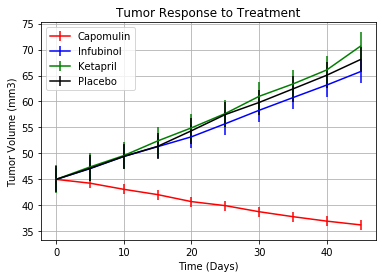

<Figure size 432x288 with 0 Axes>

In [247]:
 # Generate the Plot (with Error Bars)
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","d"]
fig, ax = plt.subplots()
for drug in drugs:
    x_data = data_needed.index.values
    y_data = data_needed[drug]
    error = sem(data_needed[drug])
    set_index = drugs.index(drug)
    plt_graph = ax.errorbar(x_data,y_data,error,color=colors[set_index])

plt.legend(drugs)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

# Save the Figur
plt.savefig("..Treatment.png")


In [248]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_data_error = merge_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
met_data_error.reset_index()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [249]:
# Data Munging
met_munging = merge_data_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
met_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [250]:
data_needed2 = met_munging[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
data_needed2

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


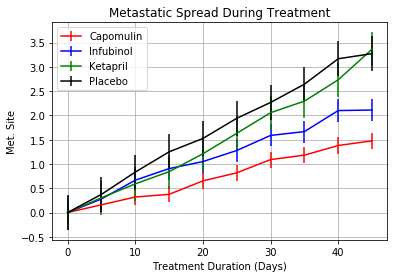

<Figure size 432x288 with 0 Axes>

In [251]:
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","d"]
fig, ax = plt.subplots()
for drug in drugs:
    x_data = data_needed2.index.values
    y_data = data_needed2[drug]
    error = sem(data_needed2[drug])
    set_index = drugs.index(drug)
    plt_graph = ax.errorbar(x_data,y_data,error,color=colors[set_index])

plt.legend(drugs)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Site')
plt.grid()
plt.show()

plt.savefig("...Metastatic.png")

In [252]:
# survival Rates
survival_df = merge_data_df.groupby(['Drug','Timepoint'])['Mouse ID'].nunique()
survival_df = pd.DataFrame(survival_df)
survival_df.reset_index(inplace=True)
survival_df.rename(columns={'Mouse ID':"Mouse Count"})

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [253]:
survival_munging = survival_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse ID')
survival_munging

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


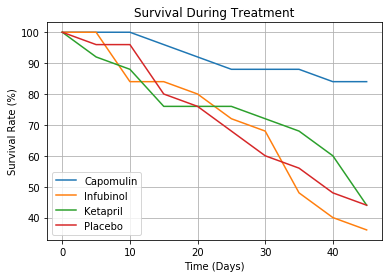

<Figure size 432x288 with 0 Axes>

In [254]:
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
fig, ax = plt.subplots()

for drug in drugs:
    x_data2 = survival_munging[drug][0]
    y_data2 = (survival_munging[drug]/x_data2)*100
    # set_index = drugs.index(drug)
    plt_graph = plt.plot(survival_munging.index,y_data2)


plt.legend(drugs)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.show()

plt.savefig("...survival.png")

In [255]:
# Summary
summary_df = (data_munging.iloc[-1]/data_munging.iloc[0]-1)*100
summary_df = pd.DataFrame({"Percentage Change":summary_df})
summary_df
# iloc[1]

,Percentage Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [256]:
new_summary = summary_df.iloc[0:6]
new_summary

,Percentage Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960


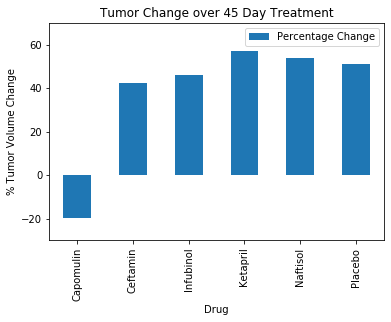

In [269]:
ax = new_summary.plot.bar()

plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

plt.savefig("...Change.png")



In [270]:
# Analysis
# 1. The first graph shows that the drug Capomulin had a better result over the number of days
# 2. The Survival graph show patients survival rate in number of days which shows the drug Infubinol have lower survival rate than the rest.
# 3. the last graph show the change in tumor size over a 45 day change, I am assumming that the Drug Capmulin did not have a great effect in patient tumor because the change was a -19%